# D213 Advanced Data Analytics Task 2 - ???
By Matthew Heino

### Purpose:
This is a Jupyter Notebook for the D213 assessment for Advanced Data Analysis. There are a few items that will be submitted with this assessment.   There will be a CSV, Jupyter Notebook, A PDF of the notebook, and a Word document that will have the written components of the assessment.  There will be some additional files:

- The cleaned datasets (section C).
- A PDF that is the Jupyter Notebook that has the executed code of the asessment.

Concepts that will be explored in this notebook will be:

- Creation of a neural network and natural langage processing.
- Data preparation 
- Data transformation, transforming data into a form that can be used in a hierarchical clustering model.

**Note 1:** Code that has references uses the APA citation can be found in sections G and H in the Word document.

**Note2 :** There will be more detailed in the Word document that accompanies this Jupyter Notebook.  The informationincluded in the Notebook is for quick reference and is not intended to encompass the whole discussion about the section or the topic.  Please refer to the Word document that accompanies this Jupyter Notebook. 

**Note 3:** Most of the code included in this notebook was previous run in Spyder IDE and some of the diagnostic output will be omitted from this notebook to keep the notebook neater.  The original script can be supplied upon request. 

# Background
There are a few items that are submitted with this assessment.   There will be a CSV, Jupyter Notebook, A PDF of the notebook, and a Word document that has the written components of the assessment.

The files used in this assessment come from the following website:
[UCI Sentiment Labeled Sentences Data Set](https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences).  There are three files used in this assessment. 

- amazon_cells_labelled.txt
- imdb_labelled.txt
- yelp_labelled.txt

These files are text-based, so the reading in these files will be a little different than in previous assessments. These files are composed of two columns one column with text describing sentiment of how a customer has reacted to a product or service. The other is a label that is either a one or zero. A one indicates that the review was a positive sentiment and the zero can be used to indicate a negative sentiment.

The total number of items is the following:

- amazon_cells_labelled.txt - 1000 rows all non-null.
- imdb_labelled.txt - 748 rows all non-null.
- yelp_labelled.txt - 1000 rows all non-null.

The rows in these files are composed of string and numeric data. No other data is incorprated within the files.

**Note:**  These files must be in the same directory if you plan to run this notebook.

# Part I: Research Question
In this section, there will be a brief discussion about a research question that is answered using the supplied data.  There will be a brief discussion of the goals the analysis hopes to accomplish. There will be an identification of the type of neural network that will be used to answer the question in this section of the document.

## A1. Research Question.
The question that can be answered using the data provided by the university is the following:

- The research question is it possible to gauge the positive and negative sentiments of customers based on the words they use to describe a product or a service? 

## A2. Objectives and Goals 
The data analysis objectives will be to see if it is possible to gauge the positive or negative sentiment by looking at the words that customers used to describe products or services.

## A3. Identification of the Neural Network.
For more information about the neural network created and employed in this assessment please refer to the Word document and the appropriate section (A3).


## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.
        3. Print some information about the dataframe. 

In [1]:
# Insert Required libraries here.

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer


### Functions Section
Functions that will be used in the assessment will be located in this section of notebook.

In [2]:
# Functions start here. #######################################################

def look_at_connotation(review_df : pd.DataFrame(), word_list : list  ) -> None:
   
    """ Method to look at the connotations of words that may be found 
         in the text column
    
    Parameters:
    -----------
        review_df (pd.dataFrame): Dataframe that has all the text reviews 
                                  and the labels.
         word_list(list):         List with  words to look at their connotation.
    
    Returns:
    ---------
        None
        
    """
    for wrd in word_list:
        
        print("\nGood Connotation: ", wrd)
        print(master_df[(master_df['text'].str.contains(wrd) >= 1) 
                        & (master_df['label'] == 1)].head(2))

        print("\nBad Connotation: ", wrd)
        print(master_df[(master_df['text'].str.contains(wrd) >= 1) 
                & (master_df['label'] == 0)].head(2))
        print("\n ######################################")

###############################################################################

def remove_extra_space(rev_text: str) -> str:
    
    """ Method to remove theextra spaces from the review text in the 'text' 
         column of the dataframe. 
    
    Parameters:
    -----------
        rev_text (str):         The review text with punctuation.
    
    Returns:
    -------
        number_remove(str):    The review text with the extra spaces removed from 
                               the text. 
        
    """
    
    space_removed = re.sub(' +', ' ', rev_text)
    
    return space_removed

###############################################################################

def remove_numbers(rev_text: str) -> str:

    """ Method to remove the numbers from the review text in the 'text' 
         column of the dataframe. 
    
    Parameters:
    -----------
        rev_text (str):           The review text with punctuation.
    
    Returns:
    -------
        number_remove(str):     The review text with the numbers removed from 
                               the text. 
        
    """
    
    number_removed = "".join(num for num in rev_text if not num.isdigit())
    
    return number_removed

###############################################################################

def remove_punctuation(rev_text: str) -> str:
    
    """ Method to remove the punctuation from the review text in the 'text' 
         column of the dataframe. 
    
    Parameters:
    -----------
        rev_text (str):           The review text with punctuation.
    
    Returns:
    -------
       punct_removed(str):     The review text with the punctuation removed from 
                               the text. 
        
    """
    punct_removed = "".join(rem for rem in rev_text if rem not in('?','.',';'
                        ,':', '!', '"', ',','/','#','%','(',')','*','+','-'
                        , '<', '>', '@', '[',']', "\\",'~', '`', '_','{'
                        , '}', "|", '-' ))
    
    return punct_removed
        
###############################################################################

Read in the data from the text files. 

**Note:** there are no headers on these files, so the header argument will set  to None.  The code that is included in this section was previously tested in Spyder.  No output will be included.

In [3]:
col_names = ['text','label']

# Amazon. **********************************************************************
amazon_df =  pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=col_names
                         , header=None)

# IMDB. ***********************************************************************
imdb_df =  pd.read_csv('imdb_labelled.txt', sep='\t', names=col_names, header=None)

# Yelp. ***********************************************************************
yelp_df =  pd.read_csv('yelp_labelled.txt', sep='\t', names=col_names, header=None)


In [4]:
# Concatenate the Dataframe into one data frame and set the index.*************
master_df = pd.concat([amazon_df, imdb_df, yelp_df])

#### Reset the index to make it easier to reference in the future, otherwise  the indexes from the previous files will still be in place.

In [5]:
master_df = master_df.reset_index(drop=True)

In [6]:
# Print one element out of the dataframe to confirm it is accessible via index.
print(master_df.iloc[2477])

text     As for the service, I thought it was good.
label                                             1
Name: 2477, dtype: object


# Part II: Data Preparation
This section will handle the preparation of the data. There will be some exploration of the data and will include other information. There will be a tokenization discussion of why it happens and why it is required. There will be a discussion about the padding process.  An identification of the number of categories of sentiment. An explanation of the steps used to clean the data.  

## B1. Exploration of the Data.

This section will look at the follwing items: 

- presence of unusual characters
- vocabulary size
- proposed word embedding length
- statistical justification for the chosen sequence length

????????????????????????????????????????????????????????????????????????????

Explore the data within the dataframe and get some information about it. Print a few of the elements in the dataframe randomly.

In [7]:
#master_df.info()

In [8]:
#master_df.sample(10, random_state=2477)

Look at the distribution of the labels.  To see how many belong each label.  The labels in the data are either one (1) or a zero (0). These labels correspond to either a negative (0) or positive (1) sentiment.

In [9]:
master_df['label'].value_counts()

label
1    1386
0    1362
Name: count, dtype: int64

#### Create a data visual to show the distribution of the labels.

<Axes: title={'center': 'Count of Sentiment Labels'}, xlabel='Sentiment Label', ylabel='Count Per Label'>

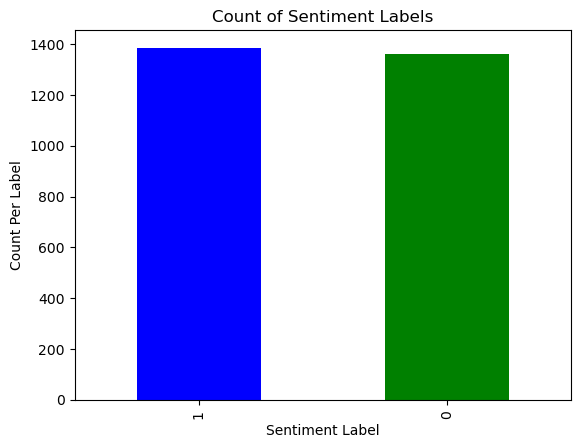

In [10]:
plt.title("Count of Sentiment Labels")
plt.xlabel("Sentiment Lable")
pd.value_counts(master_df['label']).plot.bar(color=['b', 'g']
                                             , xlabel='Sentiment Label'
                                             , ylabel='Count Per Label')

#### Look at words that can carry both a negative and postive connotation.  For example: bizarre, good, bad, great, , cheap, smell, aroma,

In [11]:
word_list = ['bizarre','good','bad','great','firm','cheap','smell','aroma','thrifty']

#look_at_connotation(master_df, word_list)

### Begin cleaning the data for further analysis. 

This is where the data will begin to be cleaned to be ready for use in the model.  This will accomplist removing punctuation, changing the text
to lowercase, tokenizing the data, and lemmatizing the data.

More information will be found in the Word document about cleaning the data (See section B).

#### Remove the punctuation from the review text and replace the current  string in the "text" column with it. 

In [12]:
#change to loc[25]

#print("BEFORE: {}".format(master_df['text'].loc[57]))

# Apply the function across all rows of the 'text' column.
master_df['text'] = master_df['text'].apply(remove_punctuation)

#print("AFTER: {}".format(master_df['text'].loc[57]))

#### Remove the numbers from the review text and replace the current string in the "text" column with it. 

In [13]:
#print("BEFORE: {}".format(master_df['text'].loc[25]))

master_df['text'] = master_df['text'].apply(remove_numbers)

#print("AFTER: {}".format(master_df['text'].loc[25]))

#### Remove the extra spaces from the review text and replace the current string in the "text" column with it.

**Note:** Was unsure if the extra spaces would cause problems.  Unable to find adequate information about this dilemma.

In [14]:
#print("BEFORE: {}".format(master_df['text'].loc[25]))

master_df['text'] = master_df['text'].apply(remove_extra_space)

#print("AFTER : {}".format(master_df['text'].loc[25]))

#### Change the review text from upper to lowercase and replace the current string in the "text" column with it.

This to make sure that same words are identified and are treated the same.

In [15]:
#print("BEFORE: {}".format(master_df['text'].loc[25]))

master_df['text'] = master_df['text'].astype(str).str.lower() 

#print("AFTER : {}".format(master_df['text'].loc[25]))

## B2. Goals of Tokenization.

In this section there will be the code that was used to tokenize the data.  For more information please refer to Word document. 

### Begin to tokenize the words in the text column of the dataframe.

Tokenize the text column into smaller components.  This process wil be discussed in the Word document in this section.


In [16]:
reg_exp = RegexpTokenizer('\w+')

#print("BEFORE: {}".format(master_df['text'].loc[57]))

master_df['token_text'] = master_df['text'].apply(reg_exp.tokenize)

#print("AFTER : {}".format(master_df['token_text'].loc[57]))

### Remove the stopwords. 

These stopwords will be downloaded from the **nltk**. It may be required to run an additional command that has been commented out below.thestopwords has been saved in its variable.  Tried to store in stopwords but received a warning about redfinition of this variable.

In [17]:
#nltk.download('stopwords') # Uncomment to download the list of stopwords.

stop_words = nltk.corpus.stopwords.words("english")

# print(stop_words[0:30])


In [18]:
#print("BEFORE: {}".format(master_df['text'].loc[57]))

master_df['token_text'] = master_df['token_text'].apply(lambda sw : 
                                                        [word for word in sw if word not in stop_words])

#print("AFTER : {}".format(master_df['token_text'].loc[57]))

### Remove words that do not show up often.

In [20]:
#print("REVIEW WORD STRING: {}".format(master_df['token_text'].loc[57]))

master_df['review_word_str'] =master_df['token_text'].apply(lambda rws : 
            ' '.join([wrd for wrd in rws if len(wrd) > 2]))

#print("REVIEW WORD STRING: {}".format(master_df['review_word_str'].loc[57]))

#### Create a list with all the words.  This is to be used to show the frequency of the words that are in the data. 
**Note:** May need to run the commented command to download 'punkt'.

In [21]:
#nltk.download('punkt')

# Create a list with all the words.  This is to be used to show the 
# frequency of the words that are in the data. 

all_words_str = ' '. join([token for token in master_df['review_word_str']])

tokenized_words = nltk.tokenize.word_tokenize(all_words_str)

freq_dist = FreqDist(tokenized_words)


In [22]:
print(freq_dist) 

<FreqDist with 5051 samples and 17691 outcomes>


In [23]:
freq_dist

FreqDist({'good': 228, 'great': 207, 'movie': 178, 'phone': 165, 'film': 158, 'one': 144, 'food': 124, 'like': 123, 'place': 114, 'time': 111, ...})

#### Drop words that do not show in the frequency below a certain amount.
This will thin the number of words that do noa have any bearing going forward with the 
creation of the wordcloud and other analysis.

In [24]:
minimum = 1

master_df['freq_dist_str'] = master_df['token_text'].apply(
    lambda fd: ' '.join([word for word in fd if freq_dist[word] >= minimum])  )

print("REVIEW WORD STRING (After): {}"
      .format(master_df['review_word_str'].loc[136]))

print("REVIEW WORD STRING [freq_dist_str] (After): {}"
      .format(master_df['freq_dist_str'].loc[136]))

REVIEW WORD STRING (After): good stuff price
REVIEW WORD STRING [freq_dist_str] (After): good stuff price


### Lemmatize the words to get similar word roots.

In [25]:
# INSERT CODE HERE 

## B3. The Padding Process.

This section will handle the padding process and what it entails.  For in depth information please refer to the Word document.


In [26]:
# INSERT CODE HERE 

## B4. Identify the Number of Categories of Sentiment.

This section handles the identification of the number of categories.  Please refer to the word document for more information 

In [27]:
# INSERT CODE HERE 

## B5. Steps Used to Clean the Data.

This will be covered in the Word document.  This will not be discussed in the Jupyter Notebook.


## B6. Copy of the Prepared Dataset. 

The cleaned dataset can be found in the following CSV file:

- ?????????????????????????????????????????????????????????????????????????????????????????????????????????

In [28]:
# INSERT CODE HERE 

In [29]:
# INSERT CODE HERE 

In [30]:
# INSERT CODE HERE 

# Part III: The Neural Network Architecture
This section will provide the output of the model. There will be a discssion of the layers of the model. The will be a justification of the hyperparameters used to create or fine tune the model. 


## C1. Output of the Model 
This section will provide output and summay function of the model.

???????????????????????????????????????????????????????????

In [31]:
## Insert code here

## C2. Number of Layers of the Model.

This discussion will be found in the Word document.  

?????????????????????????????????????????????????

In [32]:
## Insert code here

## C3. Choice of the Hyperparameters.

This discssion will be found in the word document.

# Part IV: Evaluation of the Model.

This section there will be a discussion of the model.  There will be an assessment of the model. A discussion of the predictive accuracy of the network model.

## D1. Stopping Criteria.

This discussion can be found in the Word document.


## D2. Fitness of the Model.

This section will ascertain the fitness of the model. There will be brief discussion of the fitness with the majority of the discussion being found in the Word Document.

In [33]:
## Insert code here

## D3. Visualizations of the Training Process

This section will be where the visualizations of the training proces will be coded and found.  Any pertinent discssuion of these visualizations will be found in the Word document. 
???????????????????

In [34]:
## Insert code here

## D4. Predictive Accuracy of the Model.

This discussion will be found in the Word document in the appropriate section.


# Part V: Evaluation of the Model.
Sections E, F, and G will be found in the Word document. 

# Part VI: Reporting.

## H. 

This Jupyter Notebook will be used to complete this requirement of the assessment. It will be submitted as a PDf and will accompany the other firles that were mentioned in earlier sections.

## I. Web Resources.

All web resources that were used to create code for assessment will be found in the Word document and are ommitted from this Jupyter Notebook. Please refer to the Word document for information on citations. 

## J. In-text Citations

All in-text citatione for assessment will be found in the Word document and are ommitted from this Jupyter Notebook. Please refer to the Word document for information on these citations.